In [ ]:
import pandas as pd
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import calplot

In [94]:
path ='D:/Tommy/++AI/accu_aqi/wonsi-dong-KR-Current.csv'
df = pd.read_csv(path)


In [95]:
#populate date into one column
df['date'] = df['TIMESTAMP'].str[0:10]
df = df.loc[df['date']<'2022-03-08']
df

,TIMESTAMP,NO2_PI,O3_PI,PM10_PI,PM25_PI,CO_PI,SO2_PI,OVERALL_AQI_PI,date
0,2019-10-07 18:00:00,63.1,0.1,57.7,35.8,852.3,153.4,NaN,2019-10-07
1,2019-10-07 19:00:00,64.7,0.7,33.6,14.2,789.5,128.7,NaN,2019-10-07
2,2019-10-07 20:00:00,66.3,3.1,12.0,2.2,726.7,104.0,NaN,2019-10-07
3,2019-10-07 21:00:00,68.0,6.7,3.3,1.2,663.9,79.3,NaN,2019-10-07
4,2019-10-07 22:00:00,62.3,15.1,0.0,0.0,567.7,63.4,NaN,2019-10-07
...,...,...,...,...,...,...,...,...,...
3385,2020-02-27 17:00:00,31.2,0.5,41.4,56.9,4.7,53.0,56.9,2020-02-27
3386,2020-02-27 18:00:00,31.3,0.3,38.4,52.7,4.4,48.4,52.7,2020-02-27
3387,2020-02-27 19:00:00,31.3,0.3,36.7,50.3,4.0,44.1,50.3,2020-02-27
3388,2020-02-27 20:00:00,31.3,0.3,34.3,47.0,3.6,39.8,47.0,2020-02-27


In [96]:
#group data by date (remove hourly data)
df = df.groupby("date", sort=True)["PM25_PI"].max()
df

date
2019-10-07    35.8
2019-10-08    44.9
2019-10-09    64.9
2019-10-10    79.9
2019-10-11    54.8
              ... 
2020-02-23    37.1
2020-02-24    91.3
2020-02-25    72.8
2020-02-26    58.3
2020-02-27    63.8
Name: PM25_PI, Length: 144, dtype: float64

In [100]:
n_days = 144
pm_values= df.values[:n_days]
all_days = pd.date_range('10/7/2019', periods=n_days, freq='D')
events = pd.Series(pm_values, index=all_days)

(<Figure size 720x244.8 with 2 Axes>,
 array([<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>],
       dtype=object))

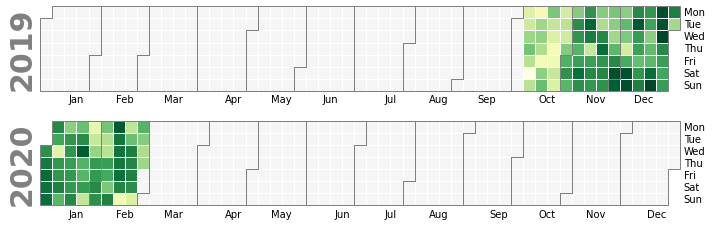

In [102]:
calplot.calplot(events, cmap='YlGn', colorbar=False)

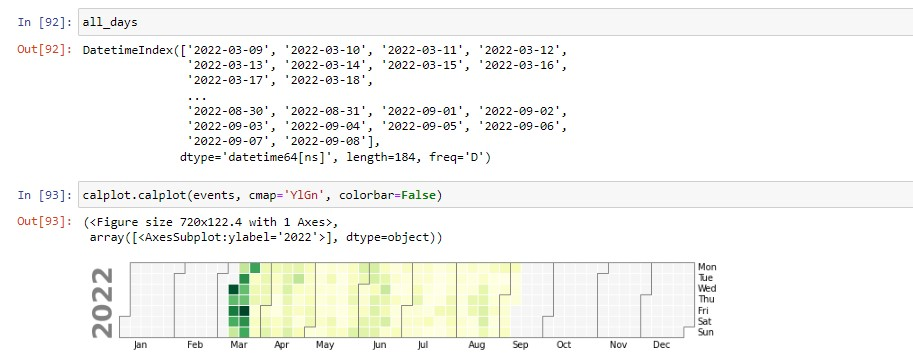